# ELG7186 - fall 2022 - Assignment 1
## Due: <strong>Wednesday Oct. 12<sup>th</sup> 2022 -- 11:59pm</strong>

#### Student Name  : Ahmed Abdo Amin Abdo / Student number: 30032730

The purpose of this assignment is to gain some experience working with the tools you will use throughout the course. You will learn:
- The basics of data loading and preparation
- Classification using the k-NN algorithm
- Classification using a Support Vector Machine (SVM)
- Calculation of metrics to assess the performance of your model

### Submission Details
Submit your Jupyter notebook .ipynb file using Brightspace. Do not include any other files or images as they will not be reviewed.
<p>
<strong>Make certain that you run all the cells in the notebook you will submit</strong> or you will loose marks.
</p>
<ul>
<li>You can submit multiple times, but only the most recent submission will be saved</li>
<li>Do not wait until the last minute to submit in case you have an unexpected issue</li>
<li>Review the late policy in the syllabus</li>
<li><strong>You must submit your own work</strong> and abide by the University of Ottawa policy on plagiarism and fraud</li>
</ul>


## Part 0. Dataset Preparation
To complete the assignment you will need to download the Cifar10 dataset and devise an appropriate training set split. You may acquire the dataset using the method of your choice. Note that some sources e.g. sklearn have reduced the samples to only 1797 (this could negatively affect your results). If you use the full dataset, you are free to sample from the dataset to reduce the overal training samples. The overall accuracy is less important than your  observations and comparisons. For example classifying the full 10,000 test images might take approximately 15 minutes using k-NN.

In this section:
<ul>
<li>Download the dataset as described above</li>
<li>Divide the raw data into appropriate training and test sets for both the images and corresponding labels for use with the subsequent parts of the assignment.</li>
<li>Visualize five samples of each class by plotting a grid using the matplotlib library.</li>
</ul>


In [5]:
!pip install -U scikit-learn

###Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams["figure.figsize"] = (10,7)
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
from collections import Counter
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import skimage
from skimage.filters import sobel
import cv2
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings(action='ignore')

#### Prepare your dataset here and display samples here.

In [361]:
# Load and split data of cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()
print(f"The shape of X_train: {X_train.shape}")
print(f"The shape of X_test: {X_test.shape}")
print(f"The shape of y_train: {y_train.shape}")
print(f"The shape of y_test: {y_test.shape}")

The shape of X_train: (50000, 32, 32, 3)
The shape of X_test: (10000, 32, 32, 3)
The shape of y_train: (50000, 1)
The shape of y_test: (10000, 1)


In [315]:
#take sample of data
X_train_sample = X_train[:10000]
y_train_sample = y_train[:10000]
X_test_sample = X_test[:2000]
y_test_sample = y_test[:2000]
print(f"The shape of X_train: {X_train_sample.shape}")
print(f"The shape of X_test: {X_test_sample.shape}")
print(f"The shape of y_train: {y_train_sample.shape}")
print(f"The shape of y_test: {y_test.shape}")

The shape of X_train: (10000, 3072)
The shape of X_test: (2000, 3072)
The shape of y_train: (10000, 1)
The shape of y_test: (10000, 1)


In [267]:
#take data for feature extraction (hog)
X_train_FEx = X_train
y_train_FEx = y_train
X_test_FEx = X_test
y_test_FEx = y_test
print(f"The shape of X_train_FEx: {X_train_sample.shape}")
print(f"The shape of X_test_FEx: {X_test_sample.shape}")
print(f"The shape of y_train_FEx: {y_train_sample.shape}")
print(f"The shape of y_test_FEx: {y_test_sample.shape}")

The shape of X_train_FEx: (1000, 32, 32, 3)
The shape of X_test_FEx: (200, 32, 32, 3)
The shape of y_train_FEx: (1000, 1)
The shape of y_test_FEx: (200, 1)


In [5]:
def show_data_balanceing(title, lst_names, lst_cls ):
  plt.bar(lst_names,lst_cls,width=0.3)
  plt.title(title)
  plt.xlabel('classes')
  plt.xticks(ha='right')
  plt.ylabel('frequenncy')
  plt.show()

In [348]:
y = y_train.reshape(-1,).tolist()
lstItems = Counter(y).most_common()
lstItems

[(6, 5000),
 (9, 5000),
 (4, 5000),
 (1, 5000),
 (2, 5000),
 (7, 5000),
 (8, 5000),
 (3, 5000),
 (5, 5000),
 (0, 5000)]

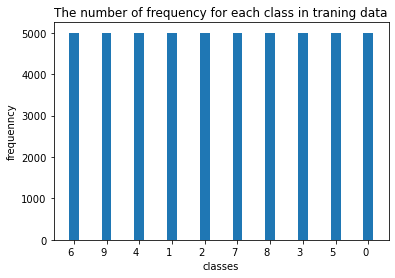

In [362]:
keys = [k for k, value in lstItems]
values = [value for k, value in lstItems]
show_data_balanceing("The number of frequency for each class in traning data",[str(x) for x in keys], values)

Plotting five samples of each class by a grid using the matplotlib library.

In [371]:
def draw5SampleEachClass(numClasses,numSamples):
  numRows = numClasses
  numColums = numSamples
  f, axarr = plt.subplots(numRows,numColums, figsize=(10, 20))
  for nClass in range(numRows):
    lst = np.where(y_train==nClass)[0][:numSamples]
    initNumCol = 0
    for i in lst:
      axarr[nClass,initNumCol].imshow(X_train[i])
      axarr[nClass, initNumCol].axis('off')
      initNumCol += 1

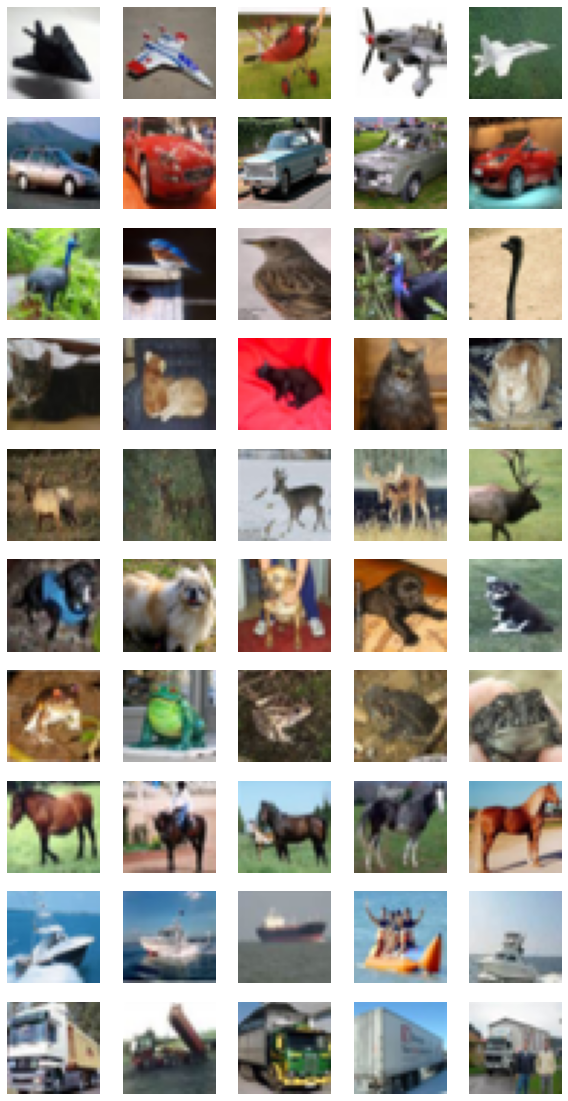

In [368]:
# each row shows 5 samples for each class (0:9)
# keys -> [1, 6, 9, 7, 0, 4, 2, 8, 3, 5]
draw5SampleEachClass(len(keys),5)

Plotting another way by a grid using the matplotlib library.

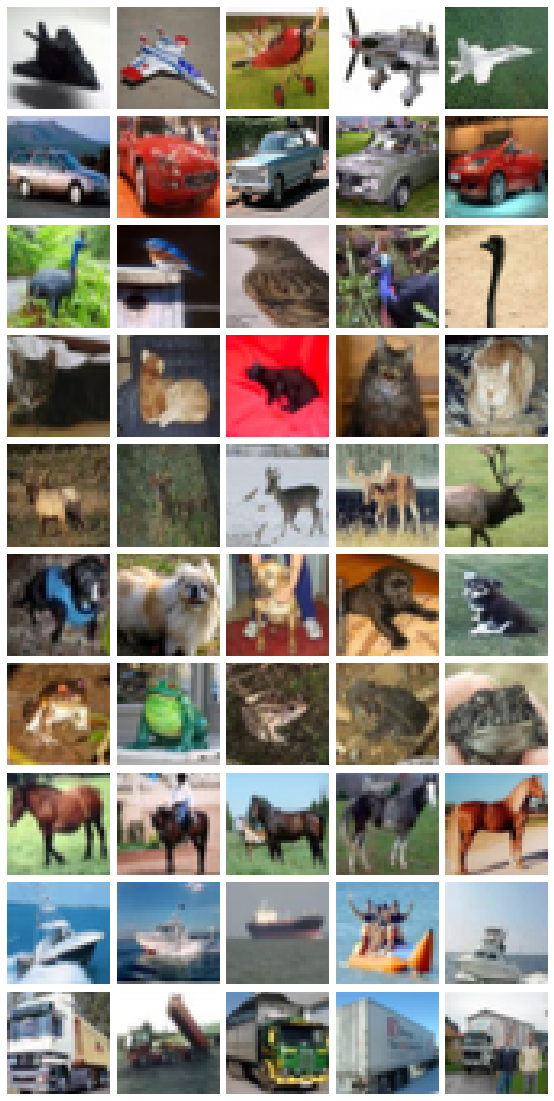

In [370]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np


fig = plt.figure(figsize=(10,20))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(10, 5),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
lstimg = []
for nClass in range(10):
    lst = np.where(y_train==nClass)[0][:5]
    for i in lst:
        lstimg.append(X_train[i])


for ax, im in zip(grid, lstimg):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    ax.axis('off')

plt.show()

 Reshaping

In [373]:
X_train = X_train.reshape(-1,X_train.shape[1]  *X_train.shape[2] *X_train.shape[3])
X_test = X_test.reshape(-1,X_test.shape[1]  *X_test.shape[2] *X_test.shape[3])

In [374]:
print(f"The shape of X_train: {X_train.shape}")
print(f"The shape of X_test: {X_test.shape}")
print(f"The shape of y_train: {y_train.shape}")
print(f"The shape of y_test: {y_test.shape}")

The shape of X_train: (50000, 3072)
The shape of X_test: (10000, 3072)
The shape of y_train: (50000, 1)
The shape of y_test: (10000, 1)


In [375]:
# Scaling
X_train = X_train / 255
X_test = X_test / 255

In [271]:
X_train_sample = X_train_sample.reshape(-1,X_train_sample.shape[1]  *X_train_sample.shape[2] *X_train_sample.shape[3])
X_test_sample = X_test_sample.reshape(-1,X_test_sample.shape[1]  *X_test_sample.shape[2] *X_test_sample.shape[3])

In [356]:
print(f"The shape of X_train: {X_train_sample.shape}")
print(f"The shape of X_test: {X_test_sample.shape}")
print(f"The shape of y_train: {y_train_sample.shape}")
print(f"The shape of y_test: {y_test_sample.shape}")

The shape of X_train: (10000, 3072)
The shape of X_test: (2000, 3072)
The shape of y_train: (10000, 1)
The shape of y_test: (2000, 1)


In [273]:
# Scaling
X_train_sample = X_train_sample / 255
X_test_sample = X_test_sample / 255

## Part 1. k-NN Classifier (2 Marks)
For this section you will implement a simple kNN Classifier on the Cifar10 dataset. To do this you will need to perform the following steps:
- Create a k-NN class. Your class must contain a method that returns predictions for your test set.
- Provide a suitable distance metric that you will use to calculate the nearest neightbours. You may choose the distance metric you believe is most suitable.
- Calculate the k nearest neighbours and make predictions.
- Choose the a value for _k_ that results in the highest accuracy on your test set. Show how you found this value.

When your classifier is working:
- Use sklearn to calculate accuracy and plot a confusion matrix using your predictions.
- Provide a brief discussion of your results

### Bonus:

When you compute the distance metric you can acheive better performance if you vectorize the computation instead of using for loops to iterate through the values. You can earn __0.5 bonus marks__ if you only need one loop, or __1 bonus mark__ if you can omit for loops for a fully vectorized distance calculation (a maximum of 1 bonus mark is available).




#### Applying the functions for four distance metrics to calculate the nearest neightbours. 

In [146]:
import statistics as st
def most_common(lst):
    '''Returns the most common element in a list'''
    # max_element= max(lst)
    # count= lst.count(max_element)
    #print(st.mode(lst))
    return max(set(lst), key=lst.count)

# calculating Euclidean distance
def Euclidean(point, data):
    '''Euclidean distance between a point  & data'''
    #print(np.sqrt(np.sum((point - data)**2, axis=1)))
    return np.sqrt(np.sum((point - data)**2, axis=1))

# distance = |x2 - x1| + |y2 - y1|
def Manhattan(point, data):
    '''Manhattan distance between a point  & data'''
    return np.abs(np.sum((point - data), axis=1))

# calculating minkowski distance
def Minkowski(point, data, p = 2):
    return sum(abs(e1-e2)**p for e1, e2 in zip(point,data))**(1/p)

# calculating hamming distance
def Hamming(point, data):
    return sum(abs(e1 - e2) for e1, e2 in zip(point, data)) / len(point)

#### Applying KNN class

In [147]:
# Applying KNN class
class KNNClassifer:
    def __init__(self, k=5, dist_metric = Euclidean):
        self.k = k
        self.dist_metric = dist_metric
        self.all_distances = []

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    #  A method that returns predictions for your test set.  
    def predict(self, X_test, k=None):
        if k is not None:
          self.k = k
        final_pre=[]
        for n, i in enumerate(X_test):
            neighbors = []
            if len(self.all_distances) == n:
              distances = self.dist_metric(i, self.X_train)
              distances = sorted(zip(distances, self.y_train))
              self.all_distances.append(distances)
              #print(self.all_distances)
            y_sorted = [y[0] for _, y in self.all_distances[n]]
            #print(y_sorted)
            neighbors.append(y_sorted[:self.k])
            final_pre.append(most_common(neighbors[0]))
        return final_pre
    
    def evaluteByAccuracy(self, X_test, y_test, k=None):
        y_pred = self.predict(X_test, k=k)
        accuracy = accuracy_score(y_test, y_pred)
        return accuracy
    
    def plotConfusionMatrix(self, y_test, y_pred, labels, TypeMethod='euclidean'):
        cm = confusion_matrix(y_test, y_pred, labels=labels)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
        disp.plot()
        plt.title("The Confusion Matrix of Knn by "+TypeMethod+" distance.")
        plt.show()

#### Applying  four distance metrics to calculate the nearest neightbours and choose the best distance metric in the test accurracy.

In [45]:
itr = 10
itr

10

In [46]:
X_train.shape

(50000, 3072)

The accuracy of KNN using Euclidean distance: 33.85% in 50000 images.


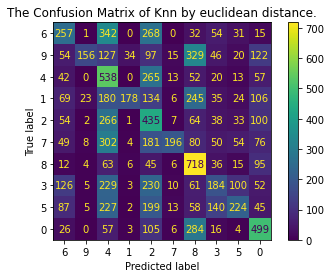

In [47]:
#Euclidean distance (default)
KnnEucl = KNNClassifer(k = itr, dist_metric = Euclidean)
KnnEucl.fit(X_train, y_train)
y_pred = np.array(KnnEucl.predict(X_test))
acc_eucl = KnnEucl.evaluteByAccuracy(X_test, y_test)
print(f"The accuracy of KNN using Euclidean distance: {acc_eucl*100}% in {X_train.shape[0]} images.")
KnnEucl.plotConfusionMatrix(y_test, y_pred, keys)

The accuracy of KNN using Manhattan distance: 12.590000000000002% in 50000 images.


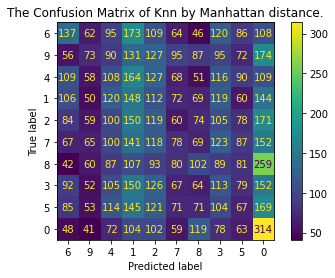

In [48]:
#Manhattan distance
KnnMan = KNNClassifer(k = itr, dist_metric = Manhattan)
KnnMan.fit(X_train, y_train)
y_pred = KnnMan.predict(X_test)
acc_Man = KnnMan.evaluteByAccuracy(X_test, y_test)
print(f"The accuracy of KNN using Manhattan distance: {acc_Man*100}% in {X_train.shape[0]} images.")
KnnMan.plotConfusionMatrix(y_test, y_pred, keys,'Manhattan')

The accuracy of KNN using Minkowski distance: 8.55% in 50000 images.


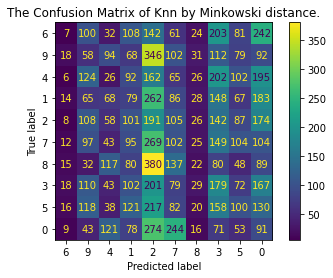

In [49]:
#Minkowski distance
KnnMows = KNNClassifer(k = itr, dist_metric = Minkowski)
KnnMows.fit(X_train, y_train)
y_pred = KnnMows.predict(X_test)
acc_Mows = KnnMows.evaluteByAccuracy(X_test, y_test)
print(f"The accuracy of KNN using Minkowski distance: {acc_Mows*100}% in {X_train.shape[0]} images.")
KnnEucl.plotConfusionMatrix(y_test, y_pred, keys,'Minkowski')

The accuracy of KNN using Hamming distance: 8.63% in 50000 images.


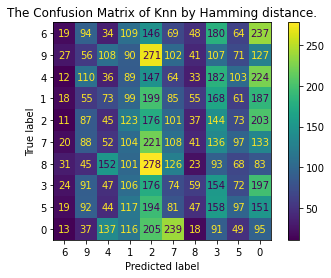

In [50]:
#Hamming distance
KnnHamm = KNNClassifer(k = itr, dist_metric = Hamming)
KnnHamm.fit(X_train, y_train)
y_pred = KnnHamm.predict(X_test)
acc_Hamm = KnnHamm.evaluteByAccuracy(X_test, y_test)
print(f"The accuracy of KNN using Hamming distance: {acc_Hamm*100}% in {X_train.shape[0]} images.")
KnnEucl.plotConfusionMatrix(y_test, y_pred, keys,'Hamming')

In [51]:
fullAccarracy = {'Euclidean': acc_eucl*100, 'Manhattan' : acc_Man*100, 'Minkowski': acc_Mows*100, 'Hamming': acc_Hamm*100}
df_fullAccarracy = pd.DataFrame([fullAccarracy],index={'The test accuracy (%)'})
df_fullAccarracy

,Euclidean,Manhattan,Minkowski,Hamming
The test accuracy (%),33.85,12.59,8.55,8.63


In [69]:
best_distanceMeasure = df_fullAccarracy.idxmax(axis = 1)[0]
best_Accuracy = df_fullAccarracy.max(axis=1)[0]
print(f'The best distance measure is {best_distanceMeasure} by {best_Accuracy}% in 50000 images.')

The best distance measure is Euclidean by 33.85% in 50000 images.


#### Applying the best distance metric to calculate the k nearest neighbours and make predictions and choose the value for k that results in the highest accuracy on the test set.

In [317]:
end = int(np.sqrt(X_train_sample.shape[0]))
end

100

The test accuracy 28.1% by k as 1


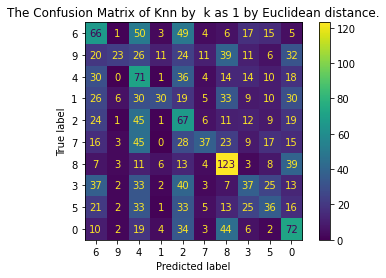

The test accuracy 28.7% by k as 10


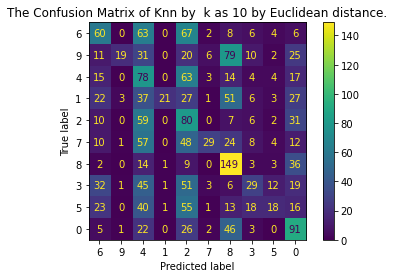

The test accuracy 28.65% by k as 19


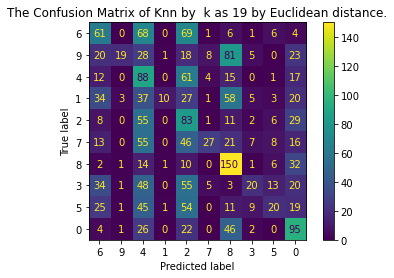

The test accuracy 27.85% by k as 28


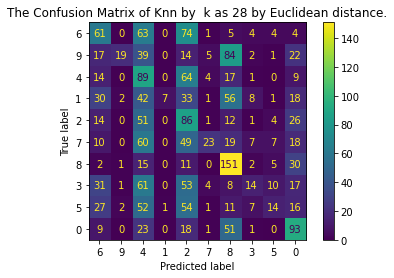

The test accuracy 27.3% by k as 37


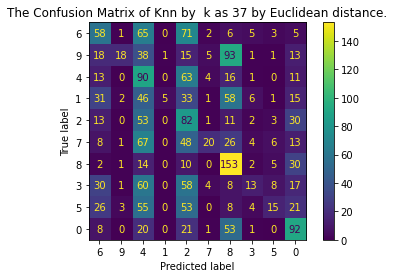

The test accuracy 27.150000000000002% by k as 46


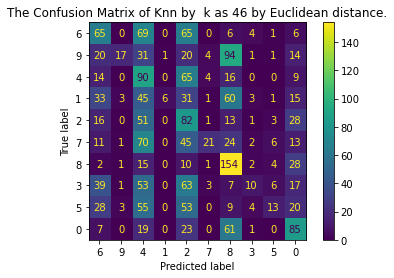

The test accuracy 26.75% by k as 55


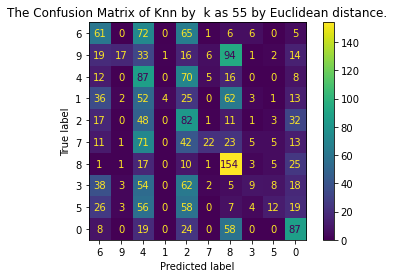

The test accuracy 26.650000000000002% by k as 64


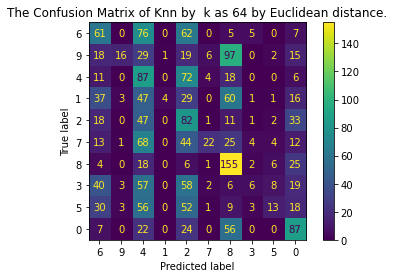

The test accuracy 26.85% by k as 73


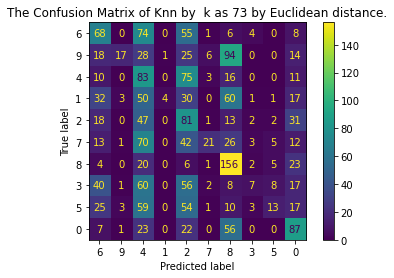

The test accuracy 27.150000000000002% by k as 82


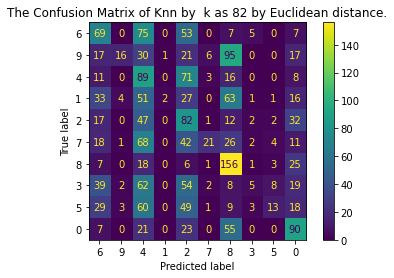

The test accuracy 26.75% by k as 91


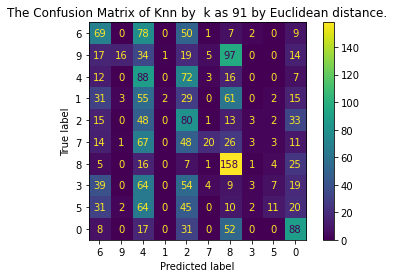

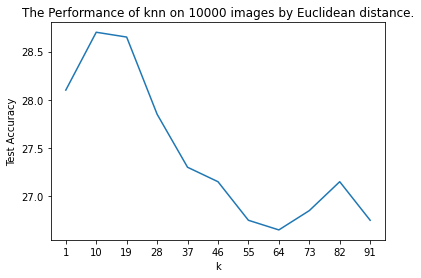

In [318]:
listFunN = {'Euclidean':Euclidean, 'Manhattan': Manhattan, 'Minkowski': Minkowski, 'Hamming': Hamming}
accuracies = []

ks = list(range(1, end, 9))
knn = KNNClassifer(k = ks[0], dist_metric= listFunN[best_distanceMeasure])
knn.fit(X_train_sample, y_train_sample)
y_pred = knn.predict(X_test_sample)
acc_best = knn.evaluteByAccuracy(X_test_sample, y_test_sample)*100
print(F'The test accuracy {acc_best}% by k as {ks[0]}')
accuracies.append(acc_best)
title = f' k as {ks[0]} by {best_distanceMeasure}'
knn.plotConfusionMatrix(y_test_sample, y_pred, keys, title)
for k in ks[1:]:
    acc_best = knn.evaluteByAccuracy(X_test_sample, y_test_sample,k)*100
    y_pred = knn.predict(X_test_sample,k)
    print(F'The test accuracy {acc_best}% by k as {k}')
    title = f' k as {k} by {best_distanceMeasure}'
    knn.plotConfusionMatrix(y_test_sample, y_pred, keys ,title)
    accuracies.append(acc_best)

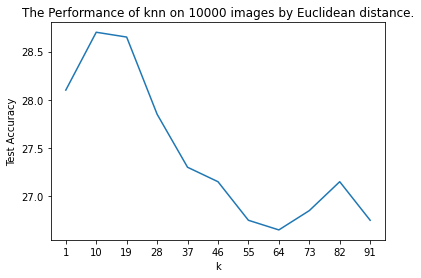

In [322]:
fig, ax = plt.subplots()
ax.plot([str(k) for k in ks], accuracies)
ax.set(xlabel="k",
       ylabel="Test Accuracy",
       title="The Performance of knn on "+ str(X_train_sample.shape[0]) + (" images by "+best_distanceMeasure+" distance."))
plt.show()

In [321]:
df_KNNAccarracies = pd.DataFrame()
df_KNNAccarracies['K as'] = [str(k) for k in ks]
df_KNNAccarracies['The test accuracy (%)'] = accuracies
df_KNNAccarracies

,K as,The test accuracy (%)
0,1,28.10
1,10,28.70
2,19,28.65
3,28,27.85
4,37,27.30
5,46,27.15
6,55,26.75
7,64,26.65
8,73,26.85
9,82,27.15


In [337]:
best_Parameter_K = df_KNNAccarracies['K as'][df_KNNAccarracies["The test accuracy (%)"].idxmax(axis=0)]
best_Acc_by_K = df_KNNAccarracies["The test accuracy (%)"].max(axis=0)
print(f'The best K-parameter is {best_Parameter_K} by {best_Acc_by_K}% in KNNClassifer algorithm.')

The best K-parameter is 10 by 28.7% in KNNClassifer algorithm.


## Part 2. Logistic Regression (3 Marks)

For this section you will perform binary classification using logistic regression. Just as in Part 1. you will use the Cifar10 dataset, however to obtain a result for each class using logistic regression you will need to use a One-vs-Rest (OvR) approach to acheive multi-class classification.

Using ```LogisticRegression()``` in sklearn, write a function to execute the OvR strategy for the Cifar10 classes. Do not use the built-in ```OneVsResClassifier()``` method. You will need to follow these basic steps:
- Train a binary classifier for each class, where the target class is a "positive" results and the combination of the remaining classes are "negative". For Cifar10 you will need 10 models.
- For each test sample compute the probabilities for each model
- Select the argmax of the probabilities to obtain the predicted class

Collect your predictions from the test set and compute the accuracy score and plot a confusion matrix.

In [25]:
# Display top 10 classes
y_train[:10]
y_test[:10]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1]], dtype=uint8)

In [26]:
# excuate One-vs-Rest (OvR) on y_train and y_test
lstClasses = list(np.unique(y_train))
y_trainDum = pd.get_dummies(y_train.flatten(), columns = lstClasses)
y_testDum = pd.get_dummies(y_test.flatten(), columns = lstClasses)
y_testDum

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,1,0
9996,0,0,0,1,0,0,0,0,0,0
9997,0,0,0,0,0,1,0,0,0,0
9998,0,1,0,0,0,0,0,0,0,0


In [27]:
# a function to Train a binary classifier for each class in LogisticRegression()
def classifierLogisticRegression(X_train, y_train, X_test, y_test, classnum):
  clf = LogisticRegression(random_state=0, max_iter=23, tol=0.01, solver='liblinear')
  clf.fit(X_train,y_train)
  prob = clf.predict_proba(X_test)[:,1]
  return prob

In [28]:
lstProbs = []
for i in lstClasses:
  lstProbs.append(classifierLogisticRegression(X_train, y_trainDum[i], X_test,y_testDum[i], i))

The accuracy test of Logistic Regression is 40.36% in 50000 images.


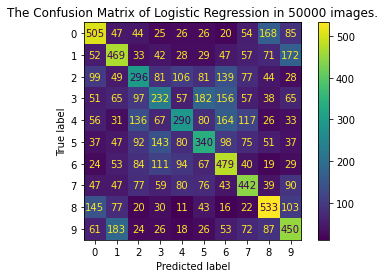

In [29]:
y_pred = np.argmax(np.array(lstProbs) , axis = 0)
accuracy = accuracy_score(y_test, y_pred)
print(f'The accuracy test of Logistic Regression is {accuracy*100}% in {X_train.shape[0]} images.')
cm = confusion_matrix(y_test, y_pred, labels=lstClasses)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lstClasses)
disp.plot()
plt.title(f"The Confusion Matrix of Logistic Regression in {X_train.shape[0]} images.")
plt.show()

## Part 3. Support Vector Machine (SVM) Classification (4 Marks)

In Part 3. you will use Scikit-learn to perform classification, again on the Cifar10 dataset. You can use the built in SVM library for classification. As with logistic regression, SVM is designed for binary classification. However, in this case Scikit-learn will handle the OvR models behind the scenes.

Your task is to compare different modes of the SVM and determine the best performer. 

Create an SVM baseline using the <code>LinearSVC()</code> function. Make sure to use the primal solution and use "ovr" for multiclass Calculate the accuracy score for comparison.

Next you will explore the effect of the cost parameter on the accuracy.
    <ul>
    <li>Run the classification with a range of C values For example: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]</li>
    <li>Plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

Add a regularization term.
    <ul>
    <li>Rerun the above experiment, but this time use L1 regularization.</li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

For the final experiment you will use the ```SVC()``` function to run the classifer with a kernel.
    <ul>
    <li>Use a radial basis function when training a new model</li>
    <li>Find the optimal combination of values for the cost and gamma parameters. Use the following values in your loop:<br/>
        <div style="margin-left:40px"><code>
        for cost in [0.01, 0.1, 1, 10, 100]:<br/>
        &emsp;for gamma in [0.01, 0.1, 1, 10, 100]:
        </code></div>
    </li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>


Choose the model with the highest accuracy and plot the confusion matrix. In your discussion explain the results of your experiments and the reason for increased performance from the baseline (if any). Comment on the effect of the cost-paramenter and the L1 penalty on accuracy as well as any overfitting you observed. Discuss the confusion matrix of the model accuracy and provide some reasons for high-values found off the main diagonal.

### Bonus Mark
Instead of using raw pixel values compute an alternate feature representation for your dataset and re-run train the model. Compare the accuracy of the model using the new feature representation with the model trained with pixel values.

In [30]:
def evalutionSVC(y_test, y_pred, Title='LinearSVC'):
    accurSVMOVR = accuracy_score(y_test, y_pred)
    print(f'The accuracy test of {Title} is {accurSVMOVR*100}% in {X_train.shape[0]} images.')
    cm = confusion_matrix(y_test, y_pred, labels=lstClasses)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lstClasses)
    disp.plot()
    plt.title(f"The Confusion Matrix of {Title} in {X_train.shape[0]} images.")
    plt.show()

Applying an SVM baseline

The accuracy test of LinearSVC is 22.18% in 50000 images.


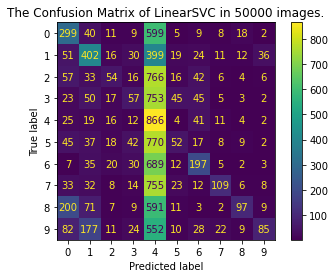

In [31]:
from sklearn.svm import LinearSVC
Model_LSVC = LinearSVC(random_state=0, multi_class="ovr")
Model_LSVC.fit(X_train, y_train)
preSVMOVR = Model_LSVC.predict(X_test)
evalutionSVC(y_test,preSVMOVR)

Exploring the effect of the cost parameter (C-parameter) on the accuracy in an SVM baseline.

In [32]:
# Run your SVM experiments here.
#model = svm.SVC(kernel='rbf', decision_function_shape='ovr', C=1)
C_parameters_in = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
lstAccuraciesSVC_C = []
for c in C_parameters_in:
    Model_LSVC = LinearSVC(random_state=0, multi_class="ovr", C= c)
    Model_LSVC.fit(X_train, y_train)
    preSVMOVR = Model_LSVC.predict(X_test)
    accurSVMOVR = accuracy_score(y_test, preSVMOVR)
    lstAccuraciesSVC_C.append(accurSVMOVR)
    print(f'The accuracy test of C-parameter as {c} is {accurSVMOVR*100}% in {X_train.shape[0]} images.')

The accuracy test of C-parameter as 0.0001 is 40.25% in 50000 images.
The accuracy test of C-parameter as 0.001 is 40.94% in 50000 images.
The accuracy test of C-parameter as 0.01 is 39.879999999999995% in 50000 images.
The accuracy test of C-parameter as 0.1 is 38.9% in 50000 images.
The accuracy test of C-parameter as 1 is 22.18% in 50000 images.
The accuracy test of C-parameter as 10 is 18.970000000000002% in 50000 images.
The accuracy test of C-parameter as 100 is 21.55% in 50000 images.
The accuracy test of C-parameter as 1000 is 18.58% in 50000 images.


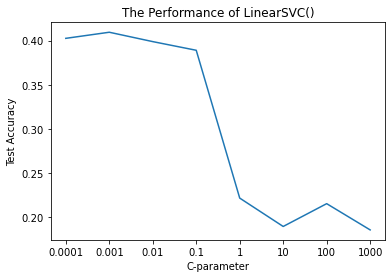

In [33]:
fig, ax = plt.subplots()
C_parameters_in_str = [str(c) for c in C_parameters_in]
ax.plot(C_parameters_in_str, lstAccuraciesSVC_C)
ax.set(xlabel="C-parameter",
       ylabel="Test Accuracy",
       title="The Performance of LinearSVC()")
plt.show()

In [241]:
df_SVM_C_Accarracies = pd.DataFrame(index=[C_parameters_in_str])
df_SVM_C_Accarracies['The test accuracy (%)'] = lstAccuraciesSVC_C
best_Parameters_SVML1= df_SVM_C_Accarracies.idxmax(axis = 0)[0]
best_Acc_SVML1 = df_SVM_C_Accarracies.max(axis=0)[0]
print(f'The best Paramters as C-parameter is {best_Parameters_SVML1[0]} by {best_Acc_SVML1*100}% in SCV algorithm.')

The best Paramters as C-parameter is 0.001 by 40.94% in SCV algorithm.


 Adding a regularization term (L1) in an SVM baseline

In [35]:
C_parameters_init = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
lstAccuraciesSVML1 = []
for c in C_parameters_init:
    Model_LSVC = LinearSVC(random_state=0, multi_class="ovr", C= c, penalty='l1',loss="squared_hinge", dual=False, tol=1e-3)
    Model_LSVC.fit(X_train, y_train)
    preSVMOVR = Model_LSVC.predict(X_test)
    accurSVMOVR = accuracy_score(y_test, preSVMOVR)
    lstAccuraciesSVML1.append(accurSVMOVR)
    print(f'The accuracy test of C-parameter as {c} is {accurSVMOVR*100}% in {X_train.shape[0]} images.')

The accuracy test of C-parameter as 0.0001 is 10.0% in 50000 images.
The accuracy test of C-parameter as 0.001 is 29.330000000000002% in 50000 images.
The accuracy test of C-parameter as 0.01 is 39.39% in 50000 images.
The accuracy test of C-parameter as 0.1 is 40.86% in 50000 images.
The accuracy test of C-parameter as 1 is 38.690000000000005% in 50000 images.
The accuracy test of C-parameter as 10 is 38.71% in 50000 images.
The accuracy test of C-parameter as 100 is 38.61% in 50000 images.
The accuracy test of C-parameter as 1000 is 38.65% in 50000 images.


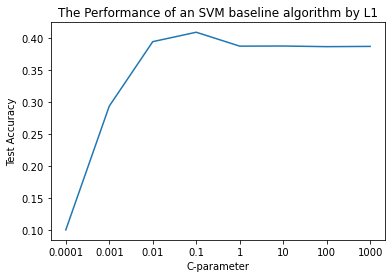

In [358]:
fig, ax = plt.subplots()
C_parameters_init_str = [str(c) for c in C_parameters_init]
ax.plot(C_parameters_init_str, lstAccuraciesSVML1)
ax.set(xlabel="C-parameter",
       ylabel="Test Accuracy",
       title="The Performance of an SVM baseline algorithm by L1")
plt.show()

In [70]:
df_SVML1Accarracies = pd.DataFrame(index=[C_parameters_init_str])
df_SVML1Accarracies['The test accuracy (%)'] = lstAccuraciesSVML1
best_Parameters_SVML1= df_SVML1Accarracies.idxmax(axis = 0)[0]
best_Acc_SVML1 = df_SVML1Accarracies.max(axis=0)[0]
print(f'The best C-parameter is {best_Parameters_SVML1[0]} by {best_Acc_SVML1*100}% in SCV algorithm by L1.')

The best C-parameter is 0.1 by 40.86% in SCV algorithm by L1.


Using the SVC() function to run the classifer with a kernel.

In [38]:
from sklearn.svm import SVC
C_parameters = [0.01, 0.1, 1, 10, 100]
gamma_parameters = [0.01, 0.1, 1, 10, 100]
lstAccuraciesSVMKer = []
lst_C_Gam = []
for c in C_parameters:
    for gam in gamma_parameters:
        Model_SVC = SVC(random_state=0, kernel="rbf", C= c, gamma= gam)
        Model_SVC.fit(X_train, y_train)
        preSVC = Model_SVC.predict(X_test)
        accurSVC = accuracy_score(y_test, preSVC)*100
        lstAccuraciesSVMKer.append(accurSVC)
        lst_C_Gam.append((c,gam))
        print(f'The accuracy test of C-parameter and gamma as ({c}, {gam}) is {accurSVC}% in {X_train.shape[0]} images.')

The accuracy test of C-parameter and gamma as (0.01, 0.01) is 33.79% in 50000 images.
The accuracy test of C-parameter and gamma as (0.01, 0.1) is 10.74% in 50000 images.
The accuracy test of C-parameter and gamma as (0.01, 1) is 10.26% in 50000 images.
The accuracy test of C-parameter and gamma as (0.01, 10) is 26.450000000000003% in 50000 images.
The accuracy test of C-parameter and gamma as (0.01, 100) is 10.0% in 50000 images.
The accuracy test of C-parameter and gamma as (0.1, 0.01) is 44.65% in 50000 images.
The accuracy test of C-parameter and gamma as (0.1, 0.1) is 10.74% in 50000 images.
The accuracy test of C-parameter and gamma as (0.1, 1) is 10.26% in 50000 images.
The accuracy test of C-parameter and gamma as (0.1, 10) is 26.5% in 50000 images.
The accuracy test of C-parameter and gamma as (0.1, 100) is 10.0% in 50000 images.
The accuracy test of C-parameter and gamma as (1, 0.01) is 55.63% in 50000 images.
The accuracy test of C-parameter and gamma as (1, 0.1) is 21.89% i

In [218]:
index = 0
lstBestAcc_CPar= []
for i in range(0,len(lstAccuraciesSVMKer),5):
    bestacc = max(lstAccuraciesSVMKer[i:i + 5])
    print(f'the best accuracy for C-parameter ({C_parameters[index]}) for all probabilities of Gamma-parameter is {bestacc}%')
    index +=1
    lstBestAcc_CPar.append(bestacc)

the best accuracy for C-parameter (0.01) for all probabilities of Gamma-parameter is 33.79%
the best accuracy for C-parameter (0.1) for all probabilities of Gamma-parameter is 44.65%
the best accuracy for C-parameter (1) for all probabilities of Gamma-parameter is 55.63%
the best accuracy for C-parameter (10) for all probabilities of Gamma-parameter is 56.71000000000001%
the best accuracy for C-parameter (100) for all probabilities of Gamma-parameter is 56.82000000000001%


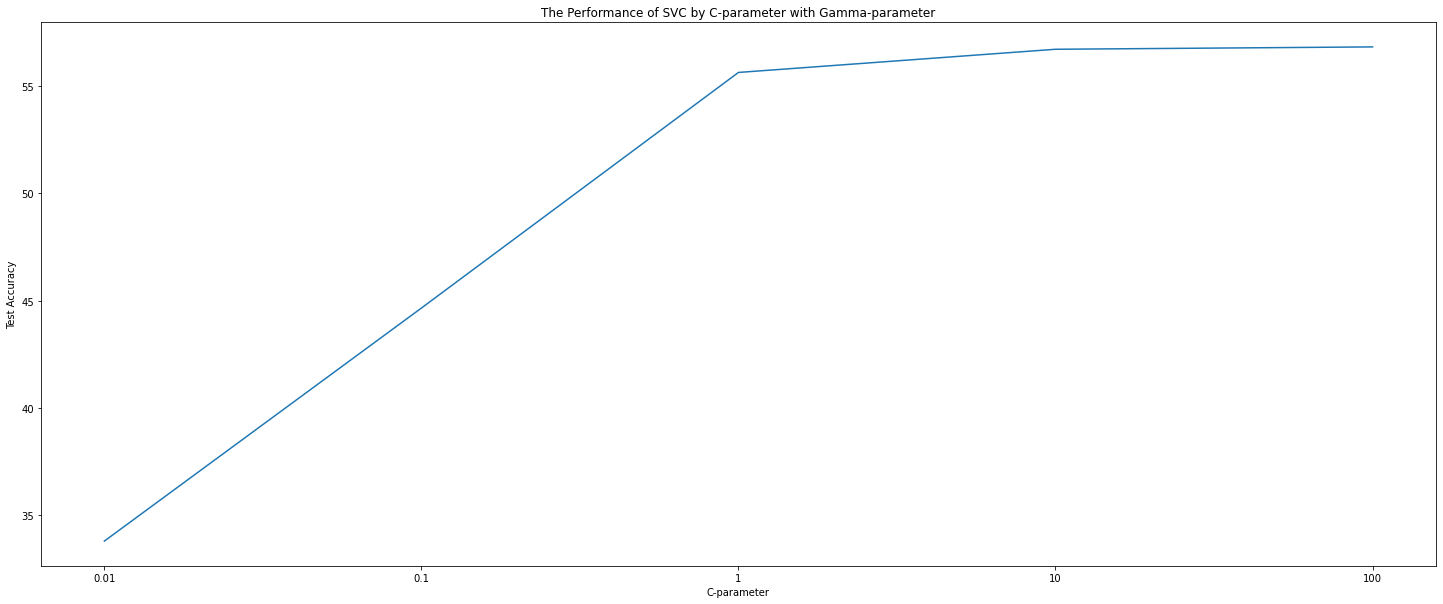

In [215]:
fig, ax = plt.subplots(figsize=(25, 10))
ax.plot([str(c) for c in C_parameters], lstBestAcc_CPar)
ax.set(xlabel="C-parameter",
       ylabel="Test Accuracy",
       title="The Performance of SVC by C-parameter with Gamma-parameter")
plt.show()

In [39]:
lst_C_Gam_str = [str(gam) for gam in lst_C_Gam]
df_SVCAccarracies = pd.DataFrame(index=[lst_C_Gam_str])
df_SVCAccarracies['The test accuracy (%)'] = lstAccuraciesSVMKer
df_SVCAccarracies

,The test accuracy (%)
"(0.01, 0.01)",33.79
"(0.01, 0.1)",10.74
"(0.01, 1)",10.26
"(0.01, 10)",26.45
"(0.01, 100)",10.00
"(0.1, 0.01)",44.65
"(0.1, 0.1)",10.74
"(0.1, 1)",10.26
"(0.1, 10)",26.50
"(0.1, 100)",10.00


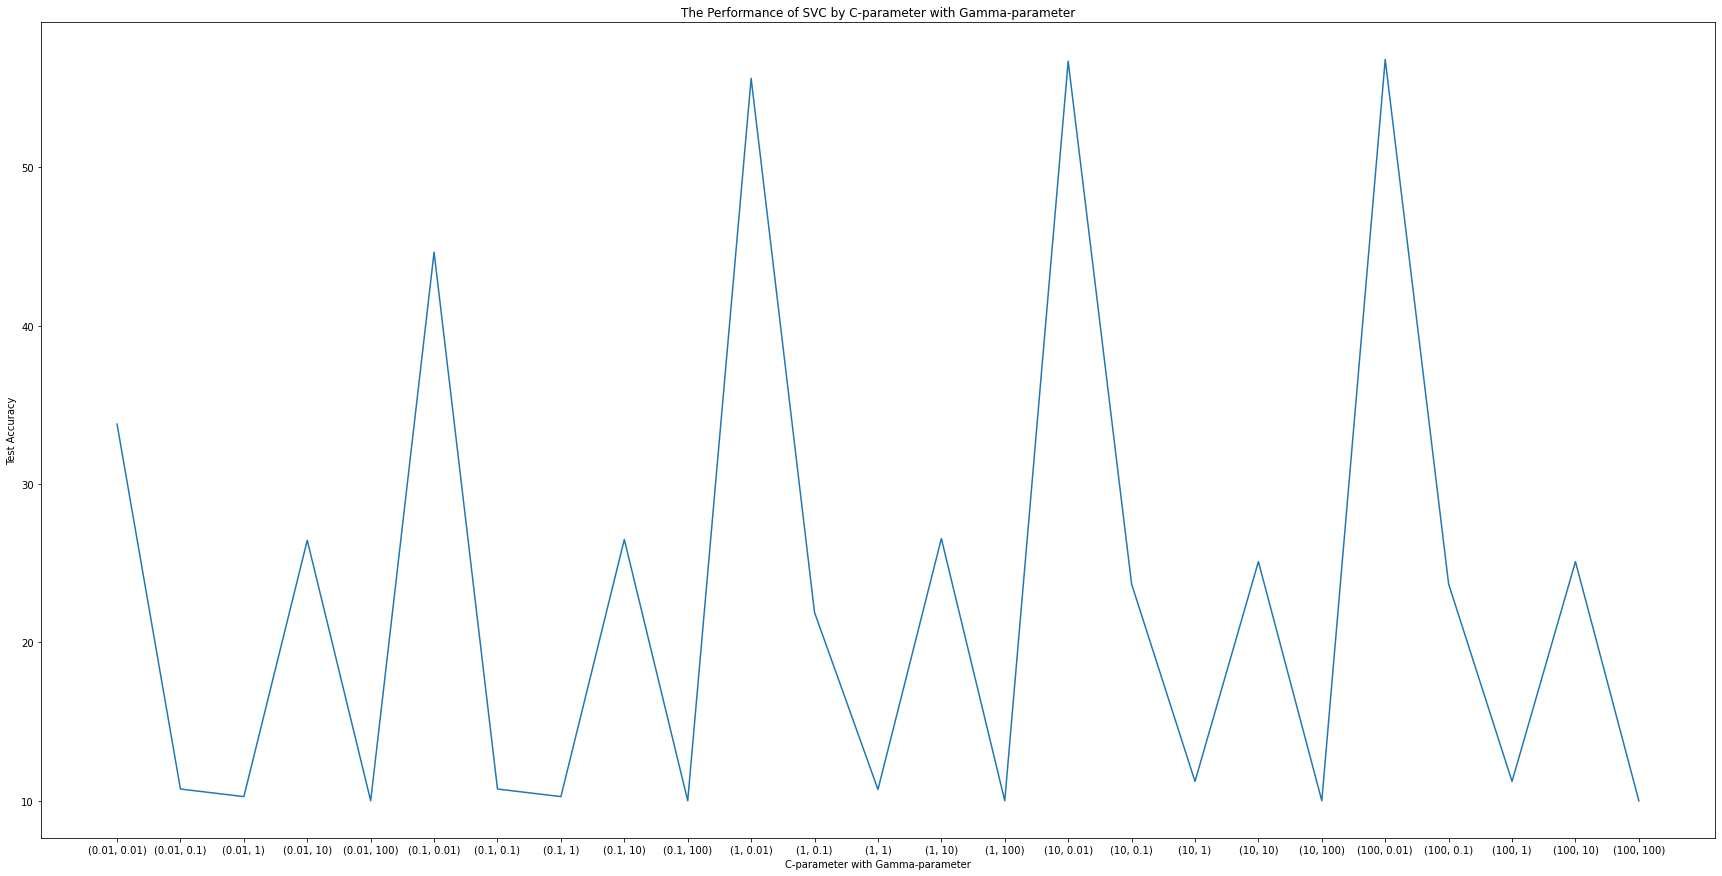

In [219]:
fig, ax = plt.subplots(figsize=(30, 15))
ax.plot(lst_C_Gam_str, lstAccuraciesSVMKer)
ax.set(xlabel="C-parameter with Gamma-parameter",
       ylabel="Test Accuracy",
       title="The Performance of SVC by C-parameter with Gamma-parameter")
plt.show()

In [40]:
best_Parameters_C_Gamma = df_SVCAccarracies.idxmax(axis = 0)[0]
best_Acc_C_Gamma = df_SVCAccarracies.max(axis=0)[0]
print(f'The best Paramters as C-parameter and Gamma-parameter is {best_Parameters_C_Gamma[0]} by {best_Acc_C_Gamma}% in SCV algorithm.')

The best Paramters as C-parameter and Gamma-parameter is (100, 0.01) by 56.82000000000001% in SCV algorithm.


The accuracy test of The best Model in SCV by C-parameter and Gamma-parameter as (100, 0.01) is 56.82000000000001% in 50000 images.


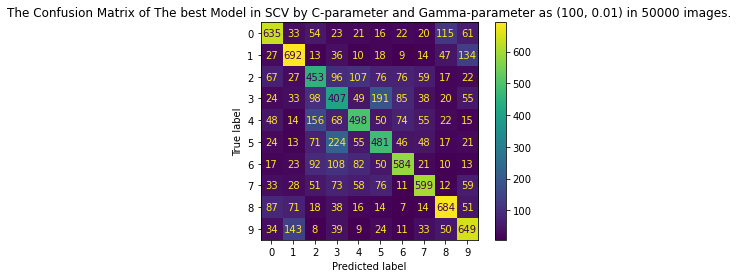

In [228]:
Model_SVC = SVC(random_state=0, kernel="rbf", C= 100, gamma= 0.01)
Model_SVC.fit(X_train, y_train)
preSVC = Model_SVC.predict(X_test)
evalutionSVC(y_test,preSVC,"The best Model in SVC by C-parameter and Gamma-parameter as (100, 0.01)")

#### explaining the results of these experiments and the reason for increased performance from the baseline
After changing the C-parameter by different values as (0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000) in an SVM baseline (LinearSVC), the accuracy test changed as (40.25%, 40.94% , 39.87%, 38.9%, 22.18%, 18.97%, 21.55%, 18.58%). When using the C parameter with the SVM, the performance changed for the best in some states or others states not. And when applying small values of C, such as 0.001, the optimization looked for a larger-margin separating hyperplane. So it gave the best result.

#### the effect of the cost-paramenter and the L1 penalty on accuracy as well as any overfitting you observed. 
After applying regularisation parameter (L1) with C-parameters, the test accuracy decreased by increasing the C-parameter because the strength of the regularisation is inversely proportional to C. So the results became 10.0%, 29.3%, 39.39%, 40.86%, 38.69%, 38.71%, 38.61%, 38.65% with C-parameters (0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000).

#### Explaining the confusion matrix of the best model accuracy and  some reasons for high-values found off the main diagonal.

Through the confusion matrix of the best model of SVM, which determined the greatest values to true positives in each class (0 to 9) as 635, 692, 453, 407, 498, 481, 584, 599, 684, and 649 classes and made wrong the others from 1000 classes of each class (0 to 9) . For example, the class 0 had got the errors by 36.5% ((1000 - 635) / 1000).
When using the champion model, the SVC by C is 100 and the gamma is 0.01. On 50,000 photos, the test's accuracy was 56.82%. The highest values were found along the major diagonal because it could predict more than 56% of the classes (0 to 9) correctly.

#### Bonus for SVM

 Feature Extraction (hog)

In [274]:
from skimage.feature import hog
def HOGFeatureExtraction(img):
  fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True)
  return hog_image

In [275]:
X_train_FEx.shape

(50000, 32, 32, 3)

In [276]:
X_train_new = np.zeros((X_train_FEx.shape[0], X_train_FEx.shape[1],X_train_FEx.shape[2]))
X_test_new = np.zeros((X_test_FEx.shape[0], X_test_FEx.shape[1],X_test_FEx.shape[2]))

In [277]:
for i in range(len(X_train_FEx)):
    X_train_new[i] = HOGFeatureExtraction(X_train_FEx[i])

In [278]:
for i in range(len(X_test_FEx)):
    X_test_new[i] = HOGFeatureExtraction(X_test_FEx[i])

In [279]:
X_train_new.shape

(50000, 32, 32)

In [280]:
# reshape
X_train_new = X_train_new.reshape(-1,X_train_new.shape[1]  *X_train_new.shape[2])
X_test_new = X_test_new.reshape(-1,X_test_new.shape[1]  *X_test_new.shape[2])

In [281]:
# Scaling
X_train_new = X_train_new / 255
X_test_new = X_test_new / 255

In [339]:
Model_SVC_FEX = SVC(random_state=0, kernel="rbf", C= 100, gamma= 0.01)
Model_SVC_FEX.fit(X_train_new, y_train_FEx)
preSVCEX = Model_SVC_FEX.predict(X_test_new)

The accuracy test of The best Model in SVC by C-parameter and Gamma-parameter as (100, 0.01) After applying Feature Extraction (hog) is 53.2% in 50000 images.


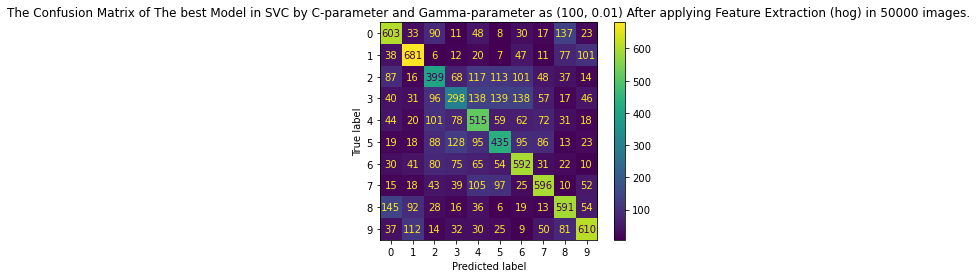

In [378]:
evalutionSVC(y_test_FEx,preSVCEX,"The best Model in SVC by C-parameter and Gamma-parameter as (100, 0.01) After applying Feature Extraction (hog)")

## Part 4. Write a Conclusion (1 Mark)

Write a conclusion comparing the results from each part of the assignment. Comment on the suitability of each method for this task.

<!-- Write your conclusion here -->
The CIFAR-10 dataset was loaded from the Keras library (keras.datasets.cifar10). This dataset consists of 60,000 RGB images of size 32x32. The dataset was divided into 50,000 training images and 10,000 testing images. Each image was subjected to some operations like reshaping and scaling. This dataset was trained on some machine learning algorithms such as k-NN Classifier, Logistic Regression, and Support Vector Machine (SVM). The k-NN Classifier was used four distance metrics (Euclidean, Manhattan, Minkowski, and Hamming) to calculate the nearest neighbours. So the best distance measure was Euclidean by 33.85% in 50000 images. It was used to calculate the k nearest neighbours and make predictions. So the best K-parameter is 10 by 28.7% in the KNNClassifer algorithm on 10,000 images only. This sample (10000 images) was used because these iterations take a long time. A One-vs-Rest (OvR) approach was applied to Logistic Regression to achieve multi-class classification. So the accuracy test of Logistic Regression was 40.36% in 50000 images. Some different modes of the SVM were compared to determine the best performer. So the accuracy test for them (SVM baseline, SVM baseline (C = 0.001), SVM baseline (C = 0.1) by penalty ('L1'), SVC with parameters(C = 100, gamma = 0.01)) was (22.18%, 40.94%, 40.86%, 56.82%) on 50000 images. So the best model of SVM was SVC by C-parameter and Gamma-parameter as (100, 0.01) on 50000 images. After applying Feature Extraction (hog), the result (53.2%) became less than the original best model. Finally, the champion model was SVC by parameters(C = 100, gamma = 0.01) by 56.82% in test accuracy.

# References

1. https://machinelearningmastery.com/distance-measures-for-machine-learning/
2. https://towardsdatascience.com/create-your-own-k-nearest-neighbors-algorithm-in-python-eb7093fc6339
3. https://matplotlib.org/stable/gallery/axes_grid1/simple_axesgrid.html